https://github.com/krother/machine_learning/tree/main/deep_learning/tensorflow

https://github.com/krother/machine_learning/blob/main/solutions/fashion_mnist_mlp.ipynb

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

In [3]:
from matplotlib import pyplot as plt

In [48]:
from tensorflow import keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## Goal
Recognize the type of clothing from a 28 by 28 pixel image

In [7]:
LABELS = "t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot".split()

## Get Data

In [37]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(Xtrain, ytrain), (Xtest, ytest) = load_data()

In [38]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

([], [])

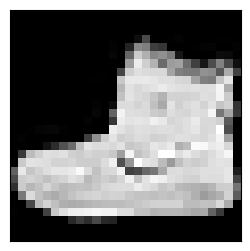

In [39]:
plt.figure(figsize=(3, 3))
plt.imshow(Xtrain[0], cmap="gray")
plt.xticks([])
plt.yticks([])

### Preprocessing

In [40]:
Xtrain = Xtrain[:10000].reshape(10000, 28, 28, 1)  # add more data here
y = k.utils.to_categorical(ytrain[:10000])   # and here
Xtrain.shape, y.shape

((10000, 28, 28, 1), (10000, 10))

In [41]:
# make normalized floats
X = Xtrain / 255.0
X.dtype

dtype('float64')

In [54]:
m = Sequential([
    k.Input(shape=(28, 28, 1)),              # DO NOT EDIT
    Conv2D(filters=10, kernel_size=(5, 5), activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(rate=0.25),  # 25% that a filter does not participate in a training step
    Conv2D(filters=20, kernel_size=(5, 5), activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=10, activation="relu"),
    BatchNormalization(),
    Dense(units=10, activation="softmax"),  # output layer, softmax: normalizes output to sum(y) = 1.0
])
#es = EarlyStopping(monitor="val_loss", patience=5)
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [55]:
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 20)       │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         3,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760 (34.22 KB)

 Trainable params: 8,680 (33.91 KB)

 Non-trainable params: 80 (320.00 B)

In [56]:
#es = EarlyStopping(monitor="val_loss", patience=5)
history = m.fit(X, y, batch_size=200, epochs=25, validation_split=0.2, verbose=True) # , callbacks=[es])

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.3239 - loss: 2.0069 - val_accuracy: 0.2790 - val_loss: 2.1507
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6559 - loss: 1.2933 - val_accuracy: 0.2090 - val_loss: 2.0738
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7165 - loss: 1.0626 - val_accuracy: 0.1715 - val_loss: 2.0827
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7498 - loss: 0.8964 - val_accuracy: 0.1895 - val_loss: 2.0567
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7717 - loss: 0.7878 - val_accuracy: 0.2245 - val_loss: 1.9498
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7766 - loss: 0.7121 - val_accuracy: 0.2595 - val_loss: 1.8284
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7863 - loss: 0.6692 - val_accuracy: 0.3240 - val_loss: 1.6172
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7938 - loss: 0.6326 - val_accuracy: 0.4825 - 

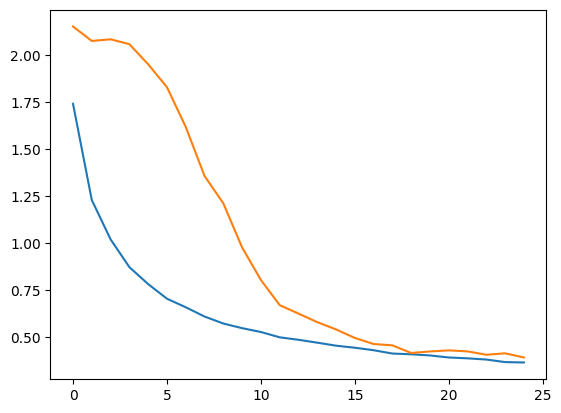

In [57]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

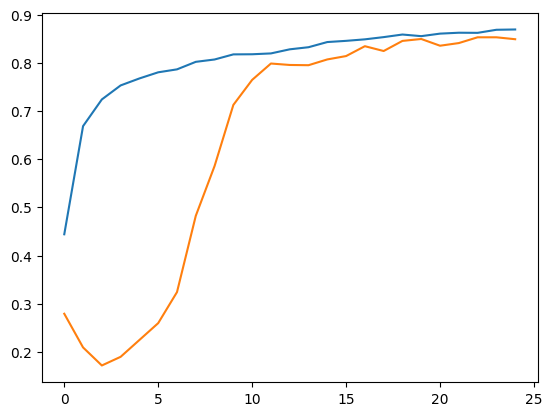

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

## Ideas for session 5:

* use data augmentation
* prediction from camera
* more metrics
* automatic hyperparameter optimization(?)